In [7]:
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [8]:
from sklearn.datasets import fetch_openml

In [9]:
mnist = fetch_openml('mnist_784')

In [10]:
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


In [11]:
X, y=mnist['data'],mnist['target']

In [12]:
X.shape

(70000, 784)

In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
y.shape

(70000,)

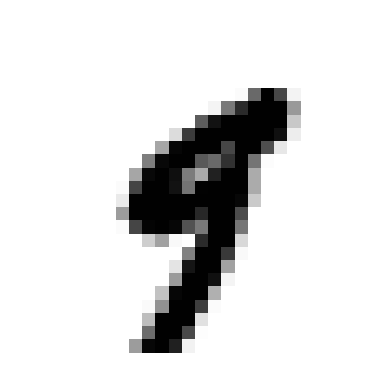

In [15]:
some_digit=X.iloc[36000].to_numpy()
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='auto')
plt.axis('off')
plt.show()

In [16]:
y[36000]

'9'

In [17]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [18]:
help(sklearn.utils._bunch.Bunch)

Help on class Bunch in module sklearn.utils._bunch:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |
 |  Container object exposing keys as attributes.
 |
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __dir__(self)
 |      Default dir() implementation.
 |
 |  __getattr__(self, key)
 |
 |  __getitem__(self, key)
 |      Return self[key].
 |
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __setattr__(self, key, value)
 |      Impleme

In [19]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [20]:
X_train,X_test,y_train,y_test=X_train.to_numpy(),X_test.to_numpy(),y_train.to_numpy(),y_test.to_numpy()

In [21]:
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [22]:
y_train_5=(y_train=='5')

In [23]:
y_test_5=(y_test=='5')

In [24]:
from sklearn.linear_model import SGDClassifier

In [25]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [26]:
np.sum(y_train_5==True)

np.int64(5421)

In [27]:
some_digit=X_train[6]
sgd_clf.predict([some_digit])

array([False])

In [28]:
from sklearn.model_selection import cross_val_score


In [29]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9338 , 0.96155, 0.96065])

In [30]:
from sklearn.base import BaseEstimator

In [31]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [32]:
never_5_clf=Never5Classifier()

In [33]:
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91345, 0.9077 , 0.9078 ])

In [34]:
from sklearn.model_selection import cross_val_predict

In [35]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_train_5,y_train_pred)

array([[52565,  2014],
       [  866,  4555]])

In [38]:
from sklearn.metrics import precision_score,recall_score

In [39]:
precision_score(y_train_5,y_train_pred)

0.6934084335515299

In [40]:
recall_score(y_train_5,y_train_pred)

0.8402508762220993

In [41]:
from sklearn.metrics import f1_score

In [42]:
f1_score(y_train_5,y_train_pred)

0.7597998331943286

In [43]:
y_scores=sgd_clf.decision_function([some_digit])

In [44]:
y_scores

array([-9213.38160903])

In [45]:
threshold=4000

In [46]:
y_some_digit_pred=(y_scores>threshold)

In [47]:
y_some_digit_pred

array([False])

In [48]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [49]:
from sklearn.metrics import precision_recall_curve

In [50]:
precisions, recalls, thresholds=precision_recall_curve(y_train_5,y_scores)

In [51]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],label='Precision')
    plt.plot(thresholds,recalls[:-1],"g-",label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    

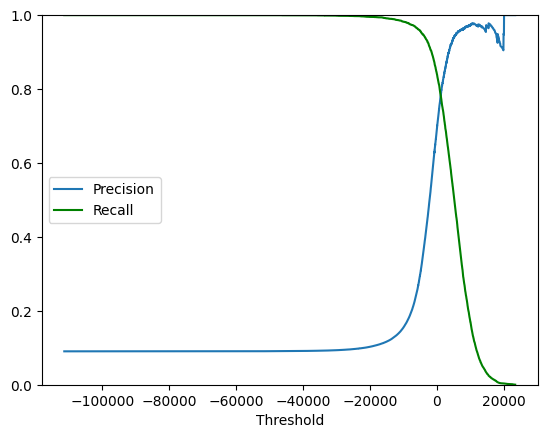

In [52]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [53]:
y_train_pred_90=(y_scores>100)

In [54]:
precision_score(y_train_5,y_train_pred_90)

0.7013007122948282

In [55]:
from sklearn.metrics import roc_curve

In [56]:
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

In [57]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('Percentage false positives')
    plt.ylabel('Percentage true positives')

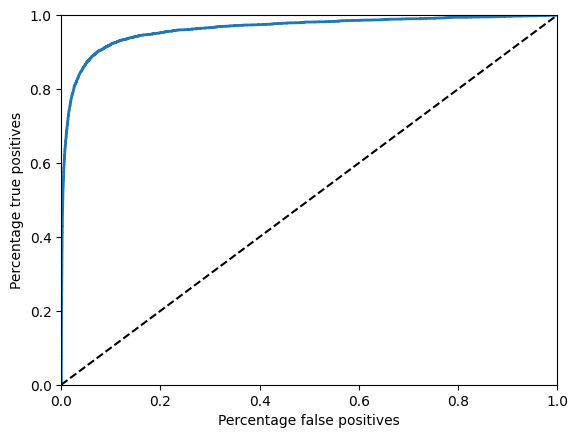

In [58]:
plot_roc_curve(fpr,tpr)
plt.show()

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
roc_auc_score(y_train_5,y_scores)

0.9630082605881266

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
forest_clf=RandomForestClassifier(random_state=42)

In [63]:
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

In [64]:
y_scores_forest=y_probas_forest[:,1]

In [65]:
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

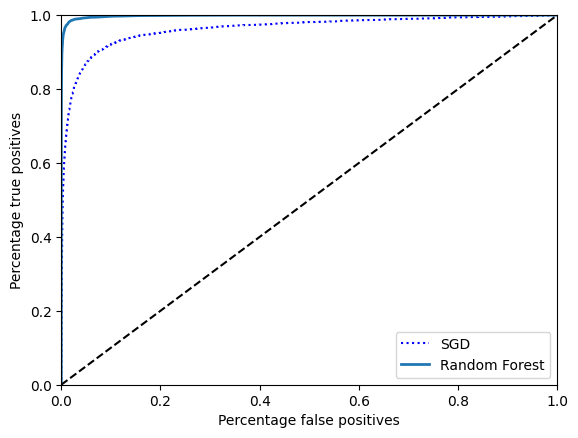

In [66]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [67]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983477458294834

In [68]:
precisions, recalls, thresholds=precision_recall_curve(y_train_5,y_scores_forest)

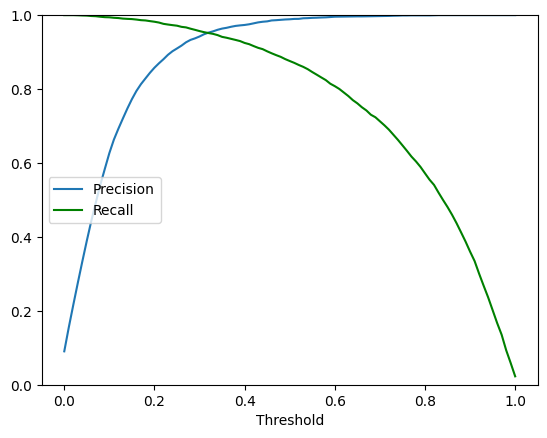

In [69]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [70]:
y_pred_90_forest=(y_scores_forest>0.5)

In [71]:
precision_score(y_train_5,y_pred_90_forest)

0.9897274633123689

In [72]:
recall_score(y_train_5,y_pred_90_forest)

0.8708725327430363

In [73]:
sgd_clf.fit(X_train,y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [74]:
sgd_clf.predict([some_digit])

array(['9'], dtype='<U1')

In [75]:
some_digit_scores=sgd_clf.decision_function([some_digit])

In [76]:
some_digit_scores

array([[-43575.46258519, -39168.84668118,  -9195.71499846,
        -15902.21556629,    461.02089369,  -9705.01223033,
        -22641.68498181,  -8312.187952  ,  -1228.37604523,
         10448.87479526]])

In [77]:
np.argmax(some_digit_scores)

np.int64(9)

In [78]:
sgd_clf.classes_[1]

np.str_('1')

In [80]:
from sklearn.multiclass import OneVsOneClassifier

In [81]:
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))

In [82]:
ovo_clf.fit(X_train,y_train)

,estimator,SGDClassifier(random_state=42)
,n_jobs,None
,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0


In [83]:
ovo_clf.predict([some_digit])

array(['9'], dtype=object)

In [84]:
len(ovo_clf.estimators_)

45

In [85]:
forest_clf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [86]:
forest_clf.predict([some_digit])

array(['9'], dtype=object)

In [87]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.01, 0.02, 0.  , 0.  , 0.  , 0.  , 0.96]])

In [88]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.86295, 0.87885, 0.8812 ])

In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')


/home/greg/Workdir/venv/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.89905, 0.9065 , 0.89915])

#### Confusion analysis

In [90]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)

KeyboardInterrupt: 

In [ ]:
conf_mx=confusion_matrix(y_train,y_train_pred)

In [ ]:
conf_mx

In [ ]:
plt.matshow(conf_mx,cmap=plt.cm.gray)